In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import misc

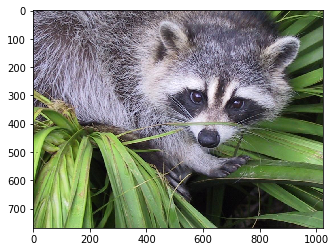

In [9]:
imshow(misc.face())

In [15]:
grey = misc.face().sum(axis=2)

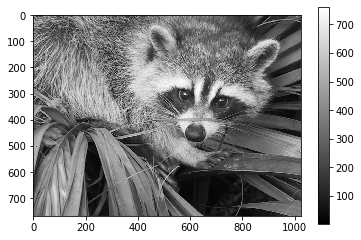

In [20]:
imshow(grey, cmap = cm.gray)
colorbar()

In [19]:
grey.min(), grey.max()

(1, 762)

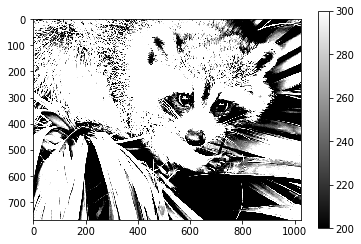

In [23]:
imshow(grey, cmap = cm.gray,vmin = 200,vmax=300)
colorbar()

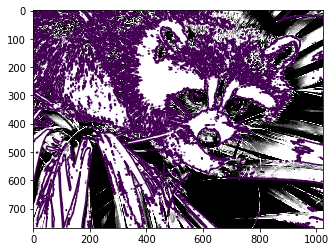

In [30]:
imshow(grey, cmap = cm.gray,vmin = 200,vmax=300)

plt.contour(grey,[400])

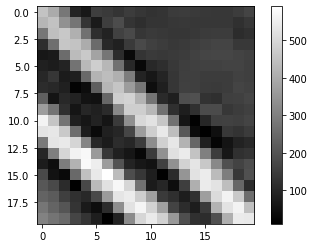

In [35]:
imshow(grey[320:340,510:530],cmap = cm.gray,interpolation="nearest")
colorbar()

In [57]:
# Masking

lx, ly = grey.shape
lx, ly 

(768, 1024)

In [58]:
X, Y = np.ogrid[0:lx,0:ly]

In [67]:
mask = (X- lx/2)**2 + (Y - 2*ly/3)**2 < lx*ly/6

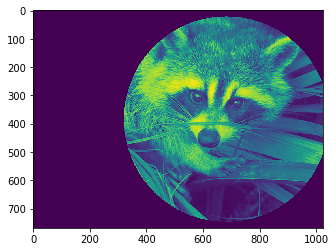

In [68]:
imshow(grey*mask)

In [75]:
mask = grey >300

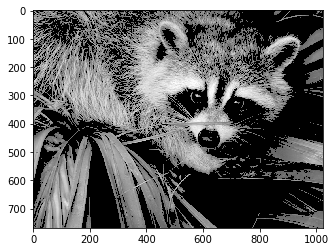

In [76]:
imshow(grey*mask,cmap = cm.gray)

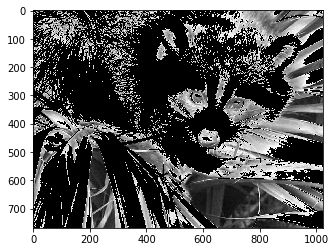

In [79]:
imshow(grey*(1-mask),cmap = cm.gray)

(array([ 67207.,  61847.,  96962., 125411., 127362., 113536., 102023.,
         56140.,  29698.,   6246.]),
 array([  1. ,  77.1, 153.2, 229.3, 305.4, 381.5, 457.6, 533.7, 609.8,
        685.9, 762. ]),
 <a list of 10 Patch objects>)

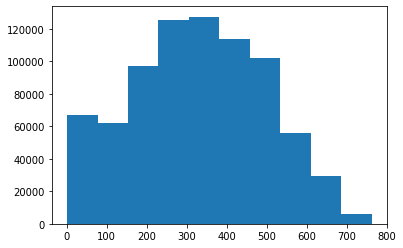

In [74]:
hist(grey.flatten())

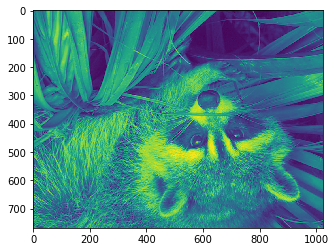

In [81]:
imshow(np.flipud(grey))

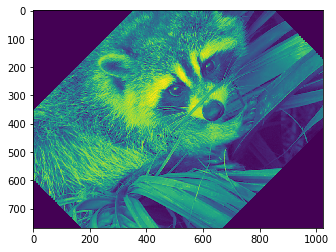

In [86]:
from scipy import ndimage
imshow(ndimage.rotate(grey,45,reshape=False))

In [88]:
# Filtering Images!

filt = np.array([[1,1,1],[1,2,1],[1,1,1]])
print(filt)

[[1 1 1]
 [1 2 1]
 [1 1 1]]


In [96]:
def smoothing(inp):
    smoothed = np.zeros([lx,ly])
    for i in range(3,lx-3):
        for j in range(3,ly-3):
            smoothed[i,j] = np.sum(filt*grey[i-1:i+2,j-1:j+2])
    return smoothed

In [91]:
i =30
j=30

In [97]:
smoothed = smoothing(smoothing(smoothing(smoothing(grey))))

In [102]:
smoothed = smoothing(smoothing(smoothing(smoothing(smoothed))))

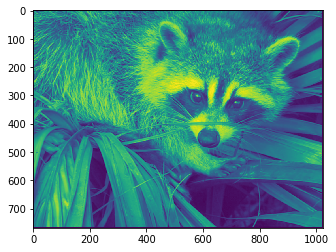

In [103]:
imshow(smoothed)

In [116]:
smoothed = ndimage.gaussian_filter(grey,10)

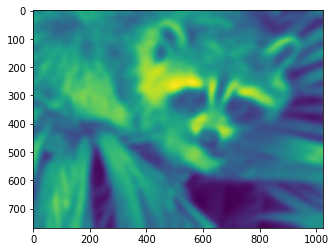

In [118]:
imshow(smoothed)

In [120]:
#sharping 

smoothed_f = ndimage.gaussian_filter(smoothed,1)
sharpened = smoothed + 100 * (smoothed - smoothed_f)

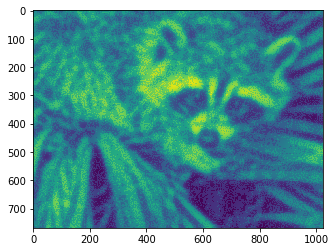

In [121]:
imshow(sharpened)

In [128]:
f = misc.face(gray = True)
noisy = f + 200*(np.random.random(f.shape))

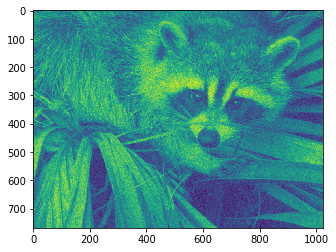

In [132]:
imshow(ndimage.gaussian_filter(noisy,1))

# Short Breakout!

1) Find a picture of your face!

2) Rotate it 45 degrees

3) Mask it to only show your eyes

4) Add noise

5) Blur it to recover your eyes!

Part II)

6) Use filters/edge seperation to pick out only your face (from original image)!


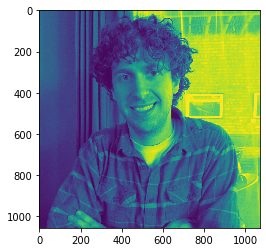

In [265]:
import matplotlib.image as mpimg

img = mpimg.imread('./ben.png') 
imshow(img)#[250:350,330:630])

In [171]:
output = np.zeros(img.shape)
output[250:350,330:630] = img[250:350,330:630]

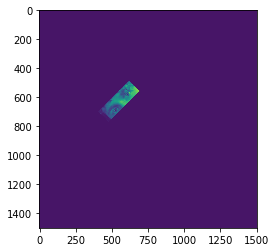

In [173]:
imshow(ndimage.rotate(output,45))

In [161]:
s2 = ndimage.rotate(output,45)

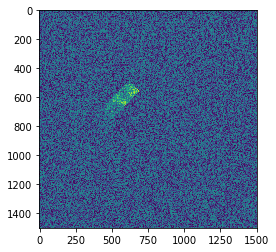

In [162]:
imshow(s2 + np.random.random(s2.shape))

In [163]:
s3 = s2 + np.random.random(s2.shape)

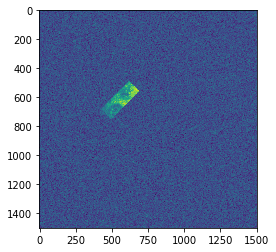

In [164]:
imshow(ndimage.gaussian_filter(s3,1))

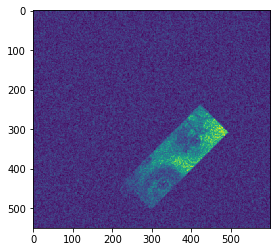

In [179]:
imshow(np.exp(ndimage.gaussian_filter(s3,1)[250:800,200:800]))

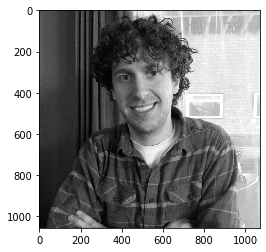

In [182]:
imshow(img,cmap = cm.gray)

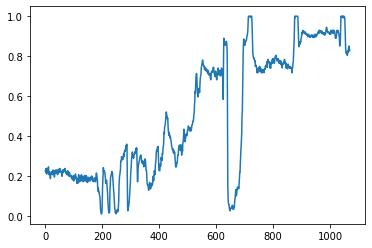

In [188]:
plt.plot(img[500,:])

In [190]:
im = np.zeros((256,256))
im[64:-64,64:-64] = 1

In [192]:
im =ndimage.rotate(im,15)
im =ndimage.gaussian_filter(im,8)

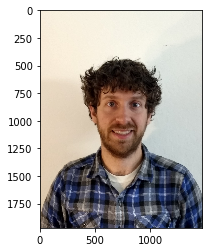

In [206]:
img = mpimg.imread('./headshot.png') 

imshow(img)

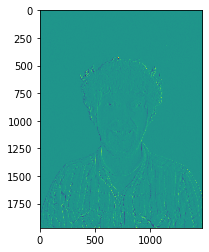

In [211]:
imshow(ndimage.sobel(img[:,:,1]))

In [216]:
sx = ndimage.sobel(im[:,:],axis=0)
sy = ndimage.sobel(im[:,:],axis=1)

average = sx**2 + sy**2

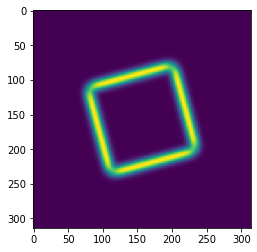

In [217]:
imshow(average)

In [219]:
# Segmentation!

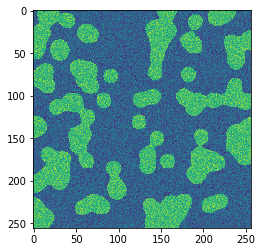

In [224]:
n = 10
l = 256
im = np.zeros((l, l))
np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

imshow(img)


(array([  128.,  3018., 15582., 17958.,  4777.,  2901., 10170.,  9090.,
         1830.,    82.]),
 array([-0.80825936, -0.54686911, -0.28547885, -0.02408859,  0.23730166,
         0.49869192,  0.76008217,  1.02147243,  1.28286269,  1.54425294,
         1.8056432 ]),
 <a list of 10 Patch objects>)

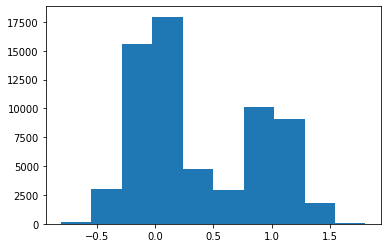

In [227]:
hist(img.flatten())

In [233]:
img_2 = ndimage.gaussian_filter(img,0)
binary_img_2 = img_2> 0.5

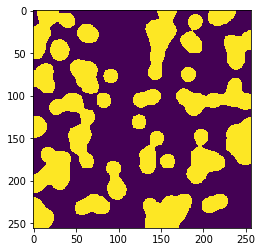

In [236]:
imshow(binary_img)

In [239]:
label_im,nb_labels = ndimage.label(binary_img)

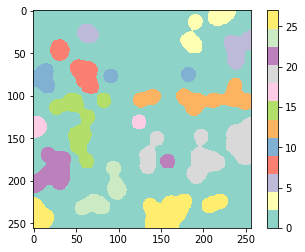

In [247]:
imshow(label_im,cmap=cm.Set3)
colorbar()

In [253]:
sizes = ndimage.sum(binary_img,label_im,range(1,nb_labels+1))

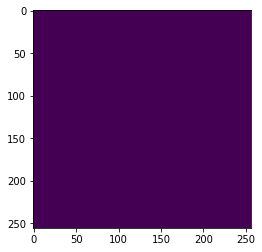

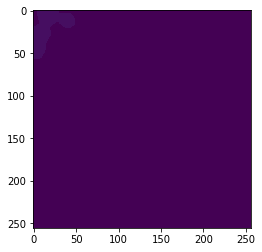

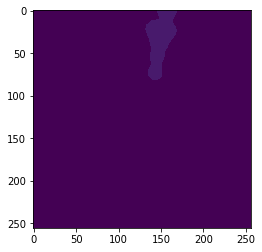

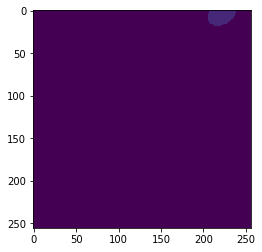

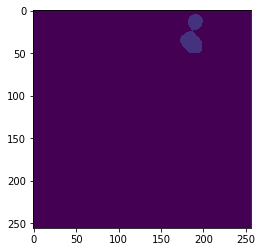

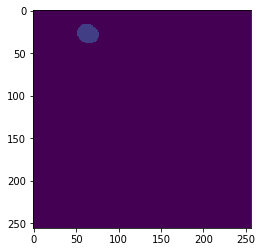

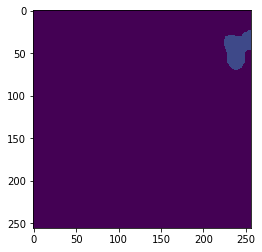

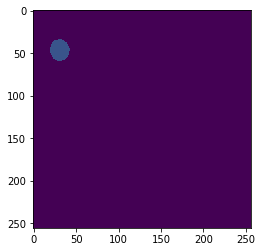

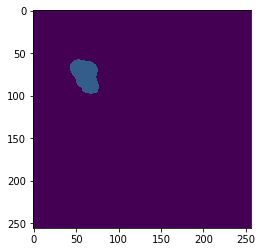

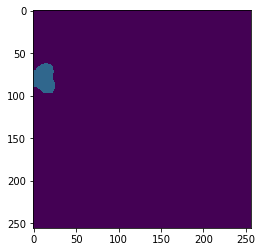

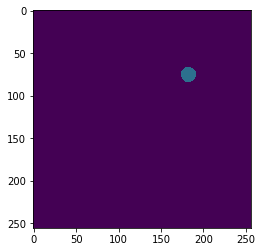

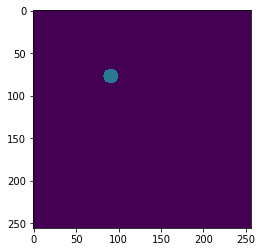

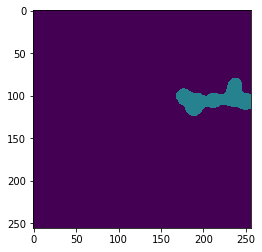

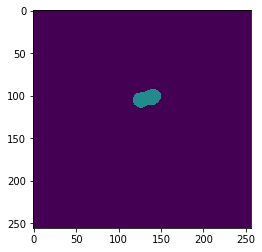

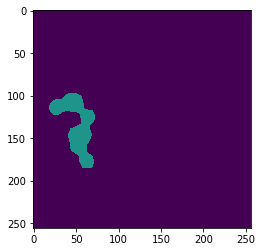

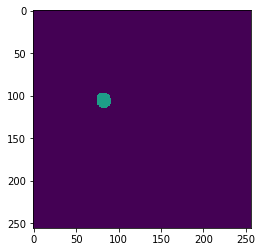

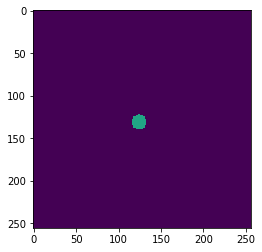

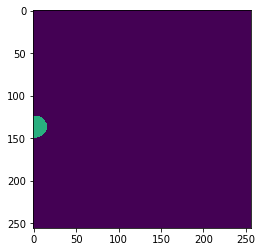

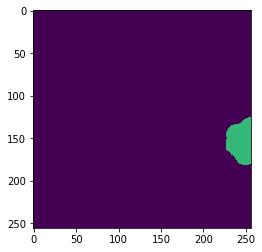

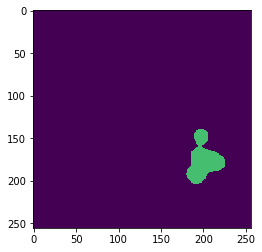

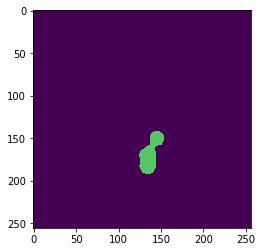

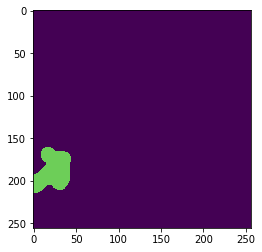

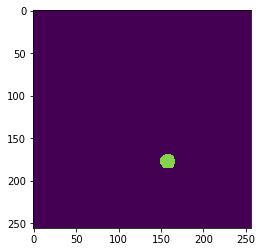

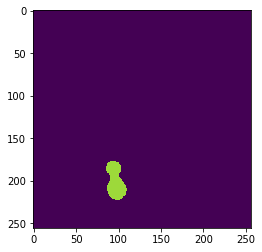

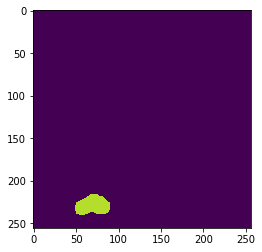

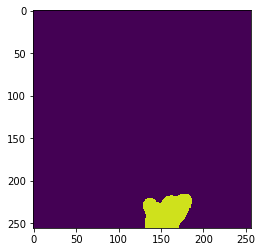

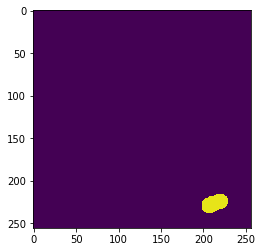

In [288]:
for i in range(0,27):
    imshow(label_im*(label_im == i),vmin = 0, vmax=27) #mask!
    show()

In [250]:
ndimage.sum?

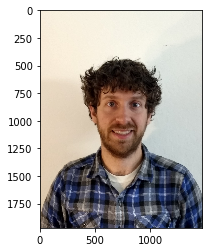

In [266]:
img = mpimg.imread('./headshot.png') 

imshow(img)

In [272]:
img = img[:,:,:3]

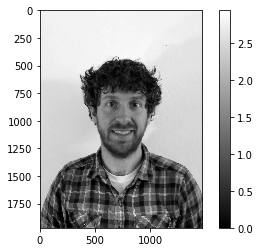

In [287]:
grey = img[:,:,:3].sum(axis=2) #making it greyscale! 
imshow(grey,cmap=cm.gray)
colorbar()

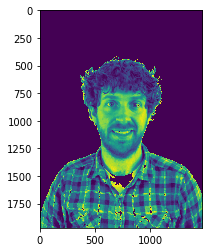

In [285]:
filt = grey < 2
imshow(grey*filt)